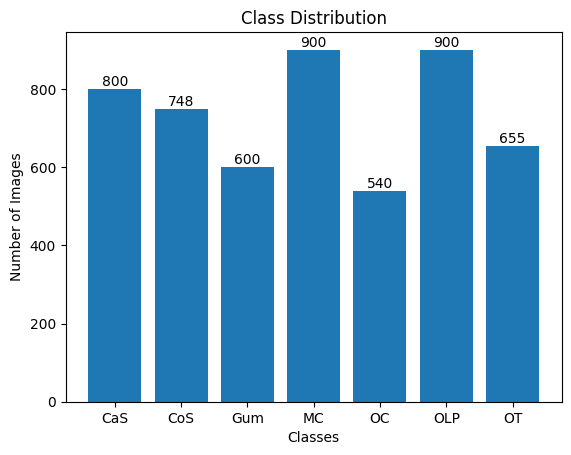

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to dataset 
dataset_path = r"D:\Teeth DataSet\Merged" 

class_names = []
image_counts = []

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        # Count image files only
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])

        class_names.append(class_name)
        image_counts.append(count)

# Plot bar chart
plt.figure()
bars = plt.bar(class_names, image_counts)

# Add numbers on top of each bar
for bar, count in zip(bars, image_counts):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        str(count),
        ha='center',
        va='bottom'
    )

plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

In [3]:
avg_images = sum(image_counts) / len(image_counts)
print(f"Average number of images per class: {avg_images:.2f}")

Average number of images per class: 734.71


# Down sampling

In [10]:
import random

folder_path_2 = r"D:\Teeth DataSet\Merged" 


target = 800

for class_name in os.listdir(folder_path_2):
    class_dir = os.path.join(folder_path_2, class_name)
    if not os.path.isdir(class_dir):
        continue
        
    images = []
    for img_name in os.listdir(class_dir):
        if img_name.endswith(('.jpg', '.jpeg', '.png')):
            images.append(os.path.join(class_dir, img_name))
    if len(images) > target:
        images_to_remove = random.sample(images, len(images) - target)
        for img_path in images_to_remove:
            os.remove(img_path)
            print(f"Removed {img_path}")

Removed D:\Teeth DataSet\Merged\MC\mc_1248_0_6651.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1280.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1224.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1224_0_2466.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1218_0_1478.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1260_0_4994.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1270.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1285_0_4061.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1266.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1203_0_3863.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1284_0_7857.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1243_0_6201.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1289_0_2282.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1200_0_6422.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1258_0_3368.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1241_0_7507.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1246_0_6680.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1260_0_477.jpg
Removed D:\Teeth DataSet\Merged\MC\mc_1202_0_1475.jpg
Rem

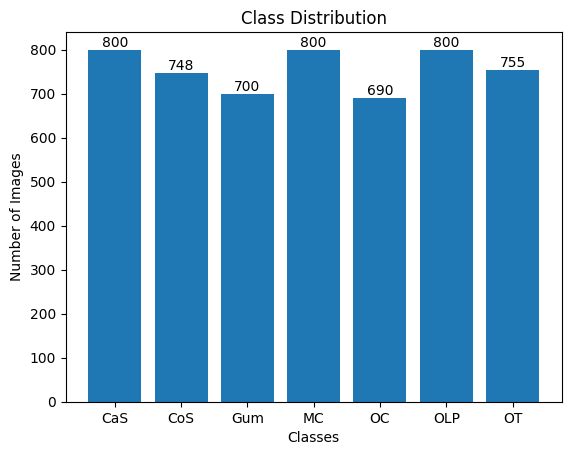

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to dataset (the folder that contains class folders)
dataset_path = r"D:\Teeth DataSet\Merged" 

class_names = []
image_counts = []

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        # Count image files only
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])

        class_names.append(class_name)
        image_counts.append(count)

# Plot bar chart
plt.figure()
bars = plt.bar(class_names, image_counts)

# Add numbers on top of each bar
for bar, count in zip(bars, image_counts):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        str(count),
        ha='center',
        va='bottom'
    )

plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

# augmantion (up sampling)

In [14]:
import os
import random
from PIL import Image, ImageEnhance, ImageOps

# Dataset path
dataset_path = r"D:\Teeth DataSet\Merged" 

# Supported formats
EXTS = (".jpg", ".jpeg", ".png")

# Loop through each class
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if not os.path.isdir(class_path):
        continue

    # Collect images
    images = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(EXTS)
    ]

    img_count = len(images)

    # Augment if less than 700
    if img_count <= 640:
        print(f"Augmenting {class_name}...")

        for i in range(50):
            # Pick random image
            img_name = random.choice(images)
            img_path = os.path.join(class_path, img_name)

            img = Image.open(img_path).convert("RGB")
            aug = img.copy()

            # Horizontal mirror only
            if random.random() > 0.5:
                aug = ImageOps.mirror(aug)

            # Small rotation
            angle = random.randint(-10, 10)
            aug = aug.rotate(angle)

            # Small brightness change
            enhancer = ImageEnhance.Brightness(aug)
            aug = enhancer.enhance(random.uniform(0.9, 1.1))

            # Save
            new_name = f"aug_{i}_{img_name}"
            aug.save(os.path.join(class_path, new_name))

print("Augmentation done!")

Augmenting OC...
Augmentation done!
